In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Load Parkinson's Data Set

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). 
Each column in the data is a particular voice measure, and each row corresponds to one of 195 voice recordings from 
these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, 
according to the "status" column which is set to 0 for healthy and 1 for PD.

In [2]:
parkinson = pd.read_csv('parkinsons.csv')

In [3]:
parkinson.head(3)

,name,age,sex,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status
0,phon_R01_S01_1,50,M,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1
1,phon_R01_S01_2,52,F,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1
2,phon_R01_S01_3,54,M,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1


In [4]:
# droping a particular column, axis =1
parkinson.drop(['name'], axis=1, inplace=True)

In [5]:
parkinson.head(3)

,age,sex,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status
0,50,M,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1
1,52,F,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1
2,54,M,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1


In [6]:
# one hot encoding for categorical variables
parkinson = pd.get_dummies(parkinson, columns=['sex'])

In [7]:
parkinson.columns

Index(['age', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'sex_F', 'sex_M'],
      dtype='object')

In [8]:
# seperate independent and dependent variables
X = parkinson.iloc[:, parkinson.columns!='status']
y = parkinson['status']

In [9]:
# splitting data into train and test
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# standardize the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Support Vector Machine Classifier

In [11]:
from sklearn import svm

svm_classification = svm.SVC(kernel='linear', C=0.01)
svm_classification.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [12]:
y_pred = svm_classification.predict(X_test)

In [13]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### SVM Evaluation

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

svm_accuracy_score = accuracy_score(y_test, y_pred)
svm_confusion_matrix = confusion_matrix(y_test, y_pred)

In [15]:
print('Accuracy Score: ', svm_accuracy_score)
print('Confusion Matrix')
print(svm_confusion_matrix)

Accuracy Score:  0.7435897435897436
Confusion Matrix
[[ 0 10]
 [ 0 29]]


#### Find Optimal hyperparameters using Grid search

In [16]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
              'degree': [2, 3, 4, 5],
              'gamma':[0.001, 0.01, 0.1, 0.5, 1],
              'kernel': ['rbf','poly', 'linear', 'sigmoid']}

In [17]:
svm_model = svm.SVC()
optimal_svm = GridSearchCV(svm_model, parameters, cv=10)
optimal_svm.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,
                               100],
                         'degree': [2, 3, 4, 5],
                         'gamma': [0.001, 0.01, 0.1, 0.5, 1],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

In [18]:
print(optimal_svm.best_params_)
print(optimal_svm.best_estimator_)

{'C': 5, 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=5, degree=4, gamma=0.1, kernel='poly')


In [19]:
from sklearn.metrics import classification_report
grid_prediction = optimal_svm.predict(X_test)
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39



In [20]:
# Fitting the RFB Kernel SVM for training
svm_kernel = svm.SVC(kernel='rbf', random_state=0)
svm_kernel.fit(X_train, y_train)

SVC(random_state=0)

In [21]:
# predicting the test set 
svm_predict = svm_kernel.predict(X_test)

In [22]:
svm_predict_accuracy = accuracy_score(y_test, svm_predict)
svm_predict_cm = confusion_matrix(y_test, svm_predict)

In [23]:
print('Accuracy Score: ', svm_predict_accuracy)
print('Confusion Matrix')
print(svm_predict_cm)

Accuracy Score:  0.8974358974358975
Confusion Matrix
[[ 6  4]
 [ 0 29]]


In [24]:
from sklearn.metrics import classification_report
kernel_prediction = svm_kernel.predict(X_test)
print(classification_report(y_test, kernel_prediction))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.88      1.00      0.94        29

    accuracy                           0.90        39
   macro avg       0.94      0.80      0.84        39
weighted avg       0.91      0.90      0.89        39



#### Support Vector Machine Regressor

In [43]:
position_salaries = pd.read_csv('Position_Salaries.csv')

In [44]:
position_salaries.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [45]:
X = position_salaries.iloc[:, 1:2].values
y = position_salaries.iloc[:, 2].values

In [46]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [47]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

**y** is a vector, i.e., a 1D array. Note that the values of **y** are huge compared to **X**.

Therefore, if we implement a model on this data, the study variable will dominate the feature variable, 
such that its contribution to the model will be neglected. We will have to scale this study variable to the same range 
as the scaled study variable.

The StandardScaler, will takes in a 2D array. We have to reshape our **y** variable from 1D to 2D.

In [48]:
y = y.reshape(-1,1)

In [49]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [50]:
# standardize the data
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [52]:
print("Scaled X")
print(X)

print("Scaled y")
print(y)

Scaled X
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
Scaled y
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


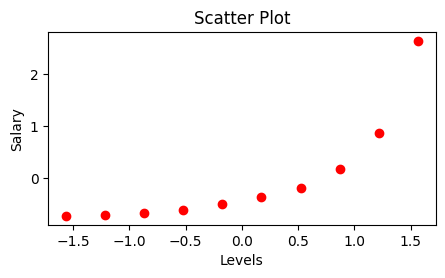

In [59]:
plt.figure(figsize=(5,2.5))
plt.scatter(X, y, color = 'red') # plotting the training set
plt.title('Scatter Plot') # adding a tittle to our plot
plt.xlabel('Levels') # adds a label to the x-axis
plt.ylabel('Salary') # adds a label to the y-axis
plt.show() # prints

**The plot shows a non-linear relationship between the Levels and Salary.**

**The data is non-linear, we will pass it to a kernel called the Radial Basis function (RBF) kernel.**

In [61]:
# create the model object
svm_regressor = svm.SVR(kernel='rbf')
# fit the model on the data
svm_regressor.fit(X, y)

SVR()

In [62]:
y_pred = svm_regressor.predict(sc_X.transform([[6.5]]))
print(y_pred)

[-0.27861589]


Note that the predicted values are returned in a 1D array.

The model prediction values are for the scaled study variable. Convert the scaled output to the unscaled data. 

Taking an inverse of the transformation on the predicted scaled variable. Reshaped the predicted variable from 1D to 2D

In [65]:
# Convert y predicted to 2D
y_pred_ = y_pred.reshape(-1,1)
print(y_pred_)

[[-0.27861589]]


Using the inverse transform function, we can convert it to an unscaled value in the original dataset

In [66]:
# Taking the inverse of the scaled value
salary_prediction = sc_y.inverse_transform(y_pred_)
print(salary_prediction)

[[170370.0204065]]


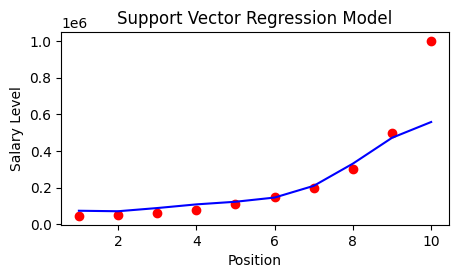

In [71]:
plt.figure(figsize=(5,2.5))
# inverse the transformation to go back to the initial scale
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svm_regressor.predict(X).reshape(-1,1)), color = 'blue')
# add the title to the plot
plt.title('Support Vector Regression Model')
# label x axis
plt.xlabel('Position')
# label y axis
plt.ylabel('Salary Level')
# print the plot
plt.show()